
# **Final Offer: Real estate price forecasting in Ames, Iowa**
### Patricio Hernandez Senosiain
---


## Contents

> [1 - Introduction](#1---Introduction)
> 
> [2 - Importing dependencies](#2---Importing-dependencies)
> 
> [3 - Data retrieval and exploratory analysis](#3---Data-retrieval-and-exploratory-analysis)
> 
> [4 - Data cleaning and preprocessing](#4---Data-cleaning-and-preprocessing)
> 
> [5 - Modelling](#5---Modelling)
> 
> [6 - Final predictions and submission](#6---Final-predictions-and-submission)


## 1 - Introduction


In this notebook, I aim to produce statistical models for house prices using a variety of machine learning algorithms and housing data from Ames, Iowa. Furthermore, I will attempt to forecast house prices for out-of-sample data and the resultant predictions will then be submmited to the Housing Prices Competition for Kaggle Learn Users. 


## 2 - Importing dependencies

In [1]:
# Importing libraries and modules

from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Declaring standard Seaborn color palette
standard_palette = []
for i in range(10):
    standard_palette += list(sns.color_palette('muted'))


simplefilter("ignore", category=ConvergenceWarning)

## 3 - Data retrieval and exploratory analysis


> [3.1 - Data retrieval](#3.1---Data-retrieval)
> 
> [3.2 - General overview](#3.2---General-overview)
> 
> [3.3 - Distribution of target variable](#3.3---Distribution-of-target-variable)
> 
> [3.4 - Distribution of features](#3.4---Distribution-of-features)
>
> [3.5 - Bivariate analysis of numerical features](#3.5---Bivariate-analysis-of-numerical-features)
> 
> [3.6 - Correlation between features](#3.6---Correlation-between-features)
> 
> [3.7 - Overview of missing values](#3.7---Overview-of-missing-values)
> 

### 3.1 - Data retrieval

In [2]:
# Reading training data into Pandas DataFrame object
data = pd.read_csv('train.csv')

### 3.2 - General overview

In [3]:
# Examining the first 10 dataset rows
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
# Examining the last five datset rows
data.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
# Deleting 'Id' column from dataset
data = data.drop('Id', axis=1)

# General overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil


#### **NOTES FROM (3.2):**

* 80 columns
* 1460 rows
* First 79 columns correspond to features
* The 80th column corresponds to the target variable `SalePrice`
* 36 numerical features
* 43 non-numerical features

#### **OBSERVATIONS:**
* Some numerical features could be categorical, thus further classification is required
* Numerical features could be classified as 'object' due to erroneous entries


As observed above, it is necessary to further classify features [as follows](https://towardsdatascience.com/data-types-in-statistics-347e152e8bee) based on their statistical data types, which will be more useful in terms of data analysis, preprocessing, and modelling. For this particular dataset, ordinal categorical variables can be assumed to have equal interval lengths between categories, therefore we will treat them as discrete variables after label encoding as this can benefit the accuracy of our analysis. With the aid of the data description file, we classified the features as follows:


#### **FEATURE CLASSIFICATION:**
|**Categorical**|**Discrete**|**Continuous**|
| -----------  |  ------------ | --------------|
|`MSSubClass`  |`YearBuilt`    |`LotFrontage`  |
|`MSZoning`    |`YearRemodAdd` |`LotArea`      |
|`Street`      |`BsmtFullBath` |`MasVnrArea`   |
|`Alley`       |`BsmtHalfBath` |`BsmtFinSF1`   |
|`LotShape`    |`FullBath`     |`BsmtFinSF2`   |
|`LandContour` |`HalfBath`     |`BsmtUnfSF`    | 
|`Utilities`   |`BedroomAbvGr` |`TotalBsmtSF`  |
|`LotConfig`   |`KitchenAbvGr` |`1stFlrSF`     |
|`LandSlope`   |`TotRmsAbvGrd` |`2ndFlrSF`     |
|`Neighborhood`|`Fireplaces`   |`LowQualFinSF` |
|`Condition1`  |`GarageYrBlt`  |`GrLivArea`    |
|`Condition2`  |`GarageCars`   |`WoodDeckSF`   |
|`BldgType`    |               |`OpenPorchSF`  |
|`HouseStyle`  |`MoSold`       |`EnclosedPorch`|
|`RoofStyle`   |`YrSold`       |`3SsnPorch`    |
|`RoofMatl`    |`OverallQual`  |`ScreenPorch`  |
|`Exterior1st` |`OverallCond`  |`PoolArea`     |
|`Exterior2nd` |`ExterQual`    |`MiscVal`      |
|`MasVnrType`  |`ExterCond`    |`GarageArea`   |
|`MiscFeature` |`BsmtExposure` |               |
|`Fence`       |`HeatingQC`    |               |
|`BsmtFinType1`|`KitchenQual`  |               |
|`BsmtFinType2`|`Functional`   |               |
|              |`FireplaceQu`  |               |
|              |`GarageQual`   |               |
|              |`GarageCond`   |               |
|              |`GarageFinish` |               |
|              |`PoolQC`       |               |


In [6]:
# Separating features according to their statistical data type
cat_feats = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
             'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
             'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
             'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
             'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType',
             'SaleCondition', 'Fence', 'GarageFinish', 'BsmtFinType1', 'BsmtFinType2']

disc_feats = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath',
              'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
              'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold', 'OverallQual',
              'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual',
              'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'GarageFinish', 'PoolQC']

non_cont_feats = (cat_feats + disc_feats)
non_cont_feats.append('SalePrice')
cont_feats = data.drop(columns=non_cont_feats).columns.tolist()
len(cont_feats+disc_feats+cat_feats)

80

### 3.3 - Distribution of target variable

In [7]:
# Separating data for target variable
target = data['SalePrice']

# Summary statistics for target variable
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

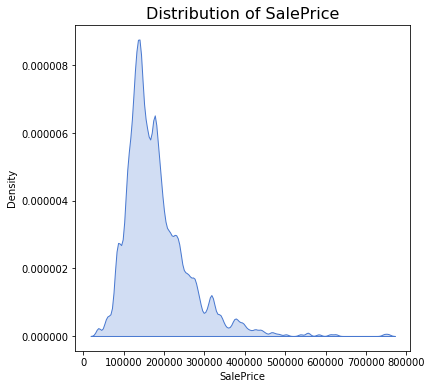

In [8]:
# Plotting distribution of values for target variable
f, axs = plt.subplots(figsize=(6, 6))
sns.kdeplot(target, color=standard_palette[0], fill=True, bw_adjust=.3, ax=axs)
plt.title('Distribution of SalePrice', size=16)
plt.show()

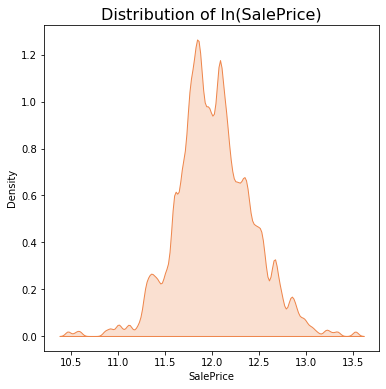

SalePrice skewness: 1.8828757597682129

ln(SalePrice) skewness: 0.12133506220520406


In [9]:
# Plotting distribution of of log-transformed target variable
log_target = np.log(target)

f, axs = plt.subplots(figsize=(6, 6))
sns.kdeplot(
    log_target, color=standard_palette[1], fill=True, bw_adjust=.3, ax=axs)
plt.title('Distribution of ln(SalePrice)', size=16)
plt.show()

# Calculating skewness of target variable data
print('SalePrice skewness: ' + str(target.skew()))
print('')

# Calculating skewness of log-transformed target variable data
print('ln(SalePrice) skewness: ' + str(log_target.skew()))

#### **NOTES FROM (3.3):**

* No missing values for `SalePrice`
* Distribution of house prices is significantly skewed

#### **OBSERVATIONS:**
* `SalePrice` data should be log-transformed to reduce skew (benefits regression models)
* After fitting a model with log-tranformed `SalePrice` predictions should be inversely transformed


In [10]:
# Log-transforming 'SalePrice'
data['ln(SalePrice)'] = np.log(data['SalePrice'])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ln(SalePrice)
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429216


### 3.4 - Distribution of continuous features

In [11]:
# Computing summary statistics for continuous features
data[cont_feats].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


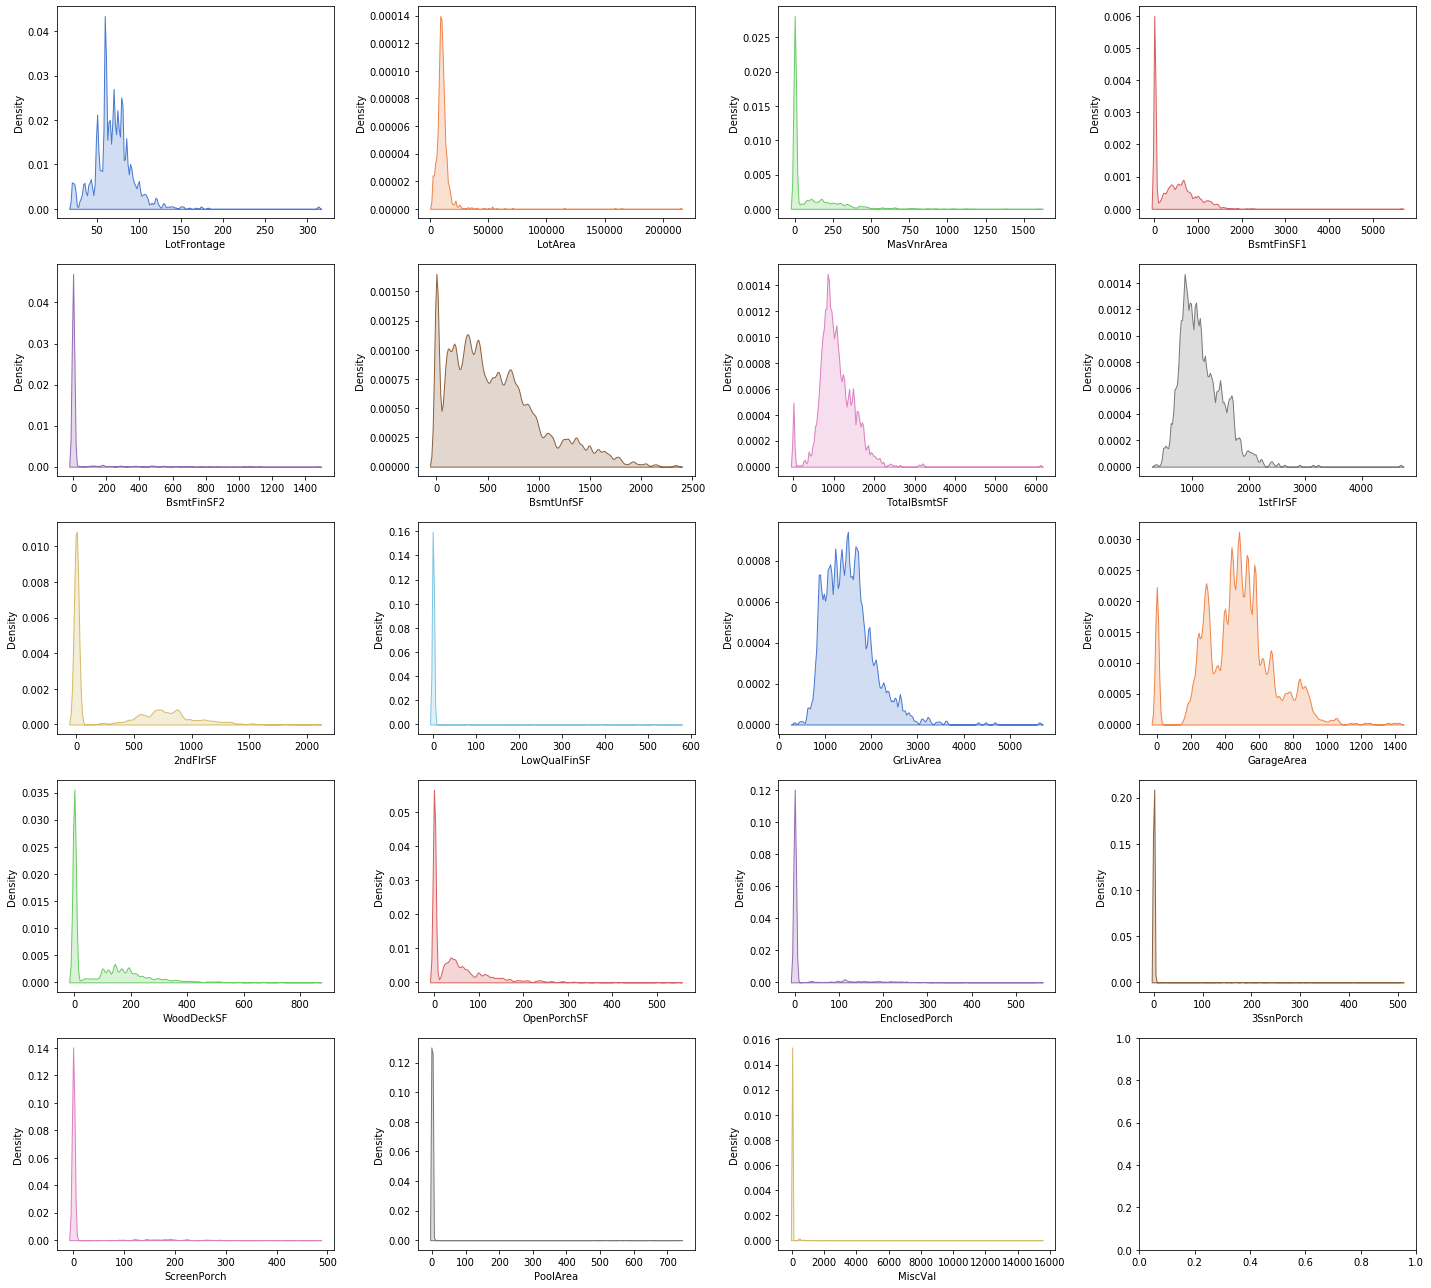

In [12]:
# Plotting distribution of data for continuous features
fig, axs = plt.subplots(5, 4)
fig.set_size_inches(20, 18)
for i in range(len(cont_feats)):
    sns.kdeplot(data[cont_feats].iloc[:, i].dropna(), ax=axs[i//4, i % 4],
                color=standard_palette[i], fill=True, bw_adjust=0.2)

plt.tight_layout()

### 3.6 - Distribution of discrete features

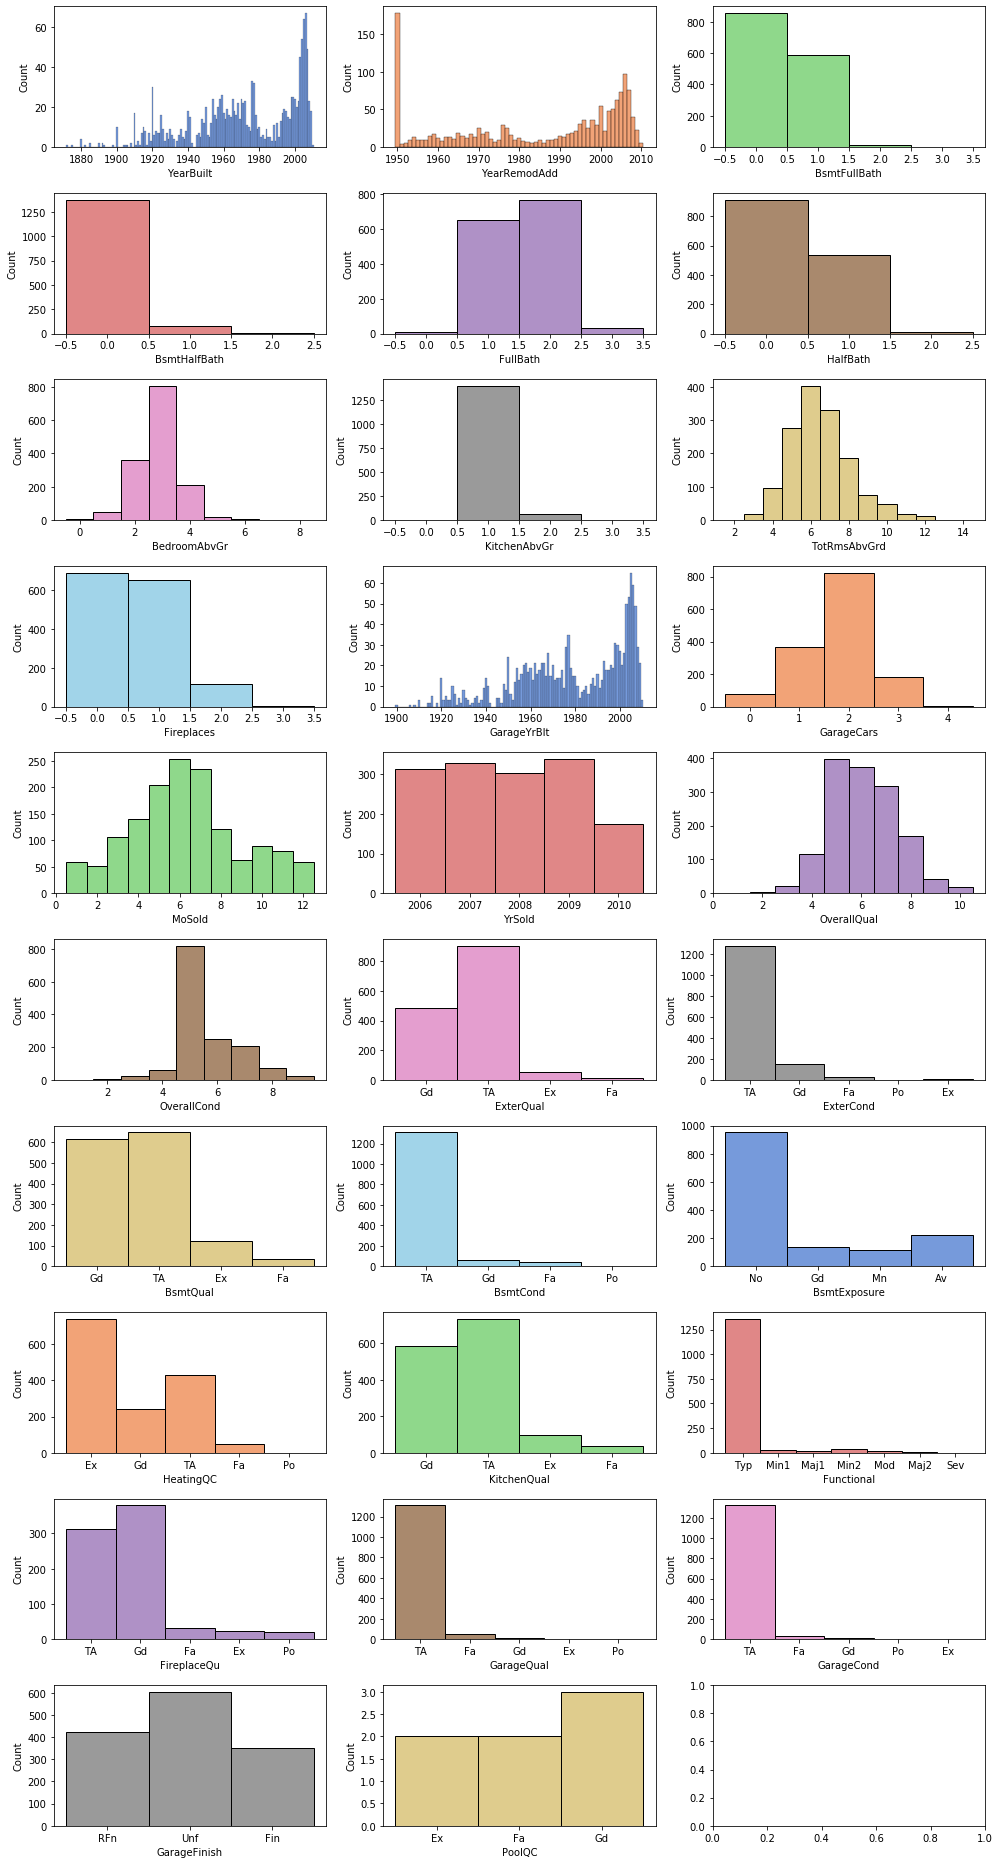

In [13]:
# Plotting distribution of data for discrete features
fig, axs = plt.subplots(10, 3)
fig.set_size_inches(14, 26)
for i in range(len(disc_feats)):
    sns.histplot(data[disc_feats].iloc[:, i].dropna(
    ), ax=axs[i//3, i % 3], color=standard_palette[i], discrete=True)

plt.tight_layout()

### 3.7 - Distribution of categorical features

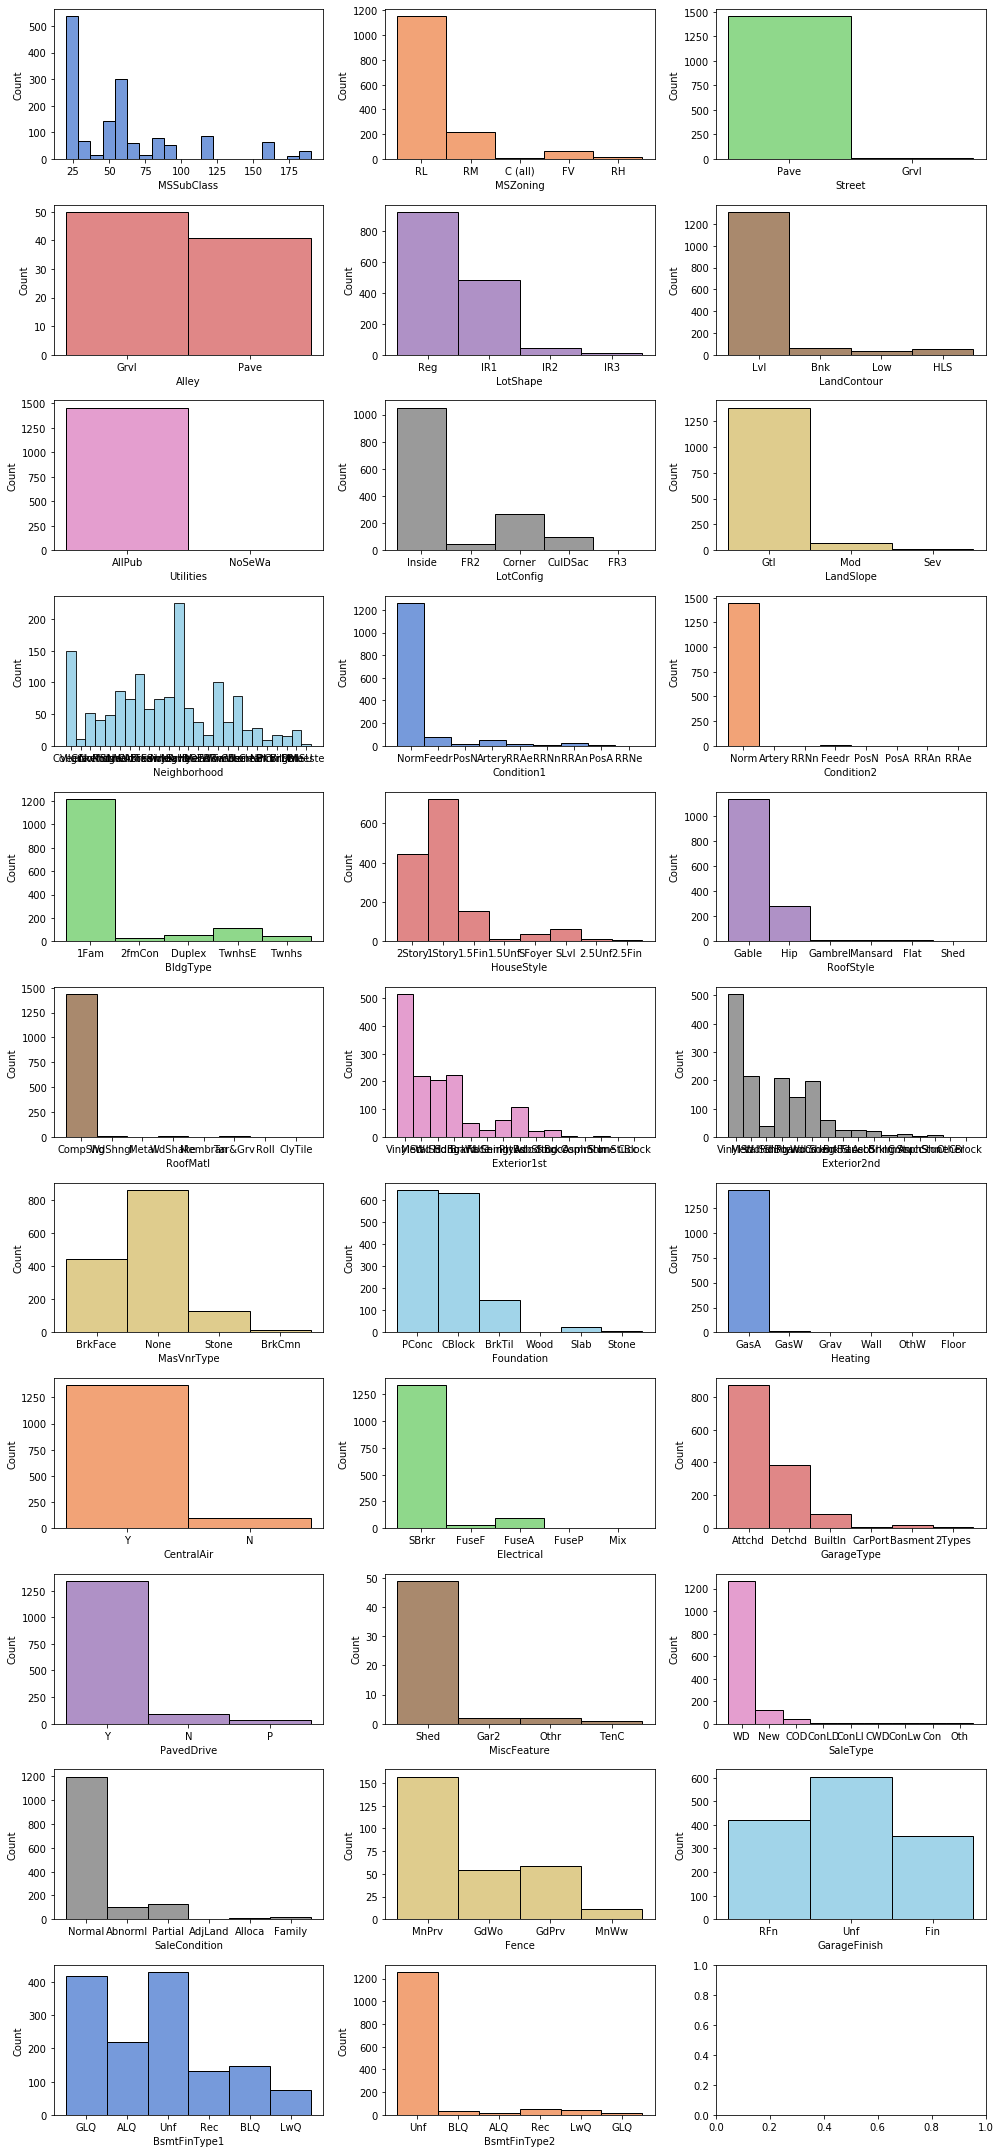

In [14]:
# Plotting distribution of data for categorical features
fig, axs = plt.subplots(11, 3)
fig.set_size_inches(14, 30)
for i in range(len(cat_feats)):
    sns.histplot(x=data[cat_feats].iloc[:, i].dropna(),
                 ax=axs[i//3, i % 3], color=standard_palette[i])

plt.tight_layout()

### 3.5 - Bivariate analysis of continuous features

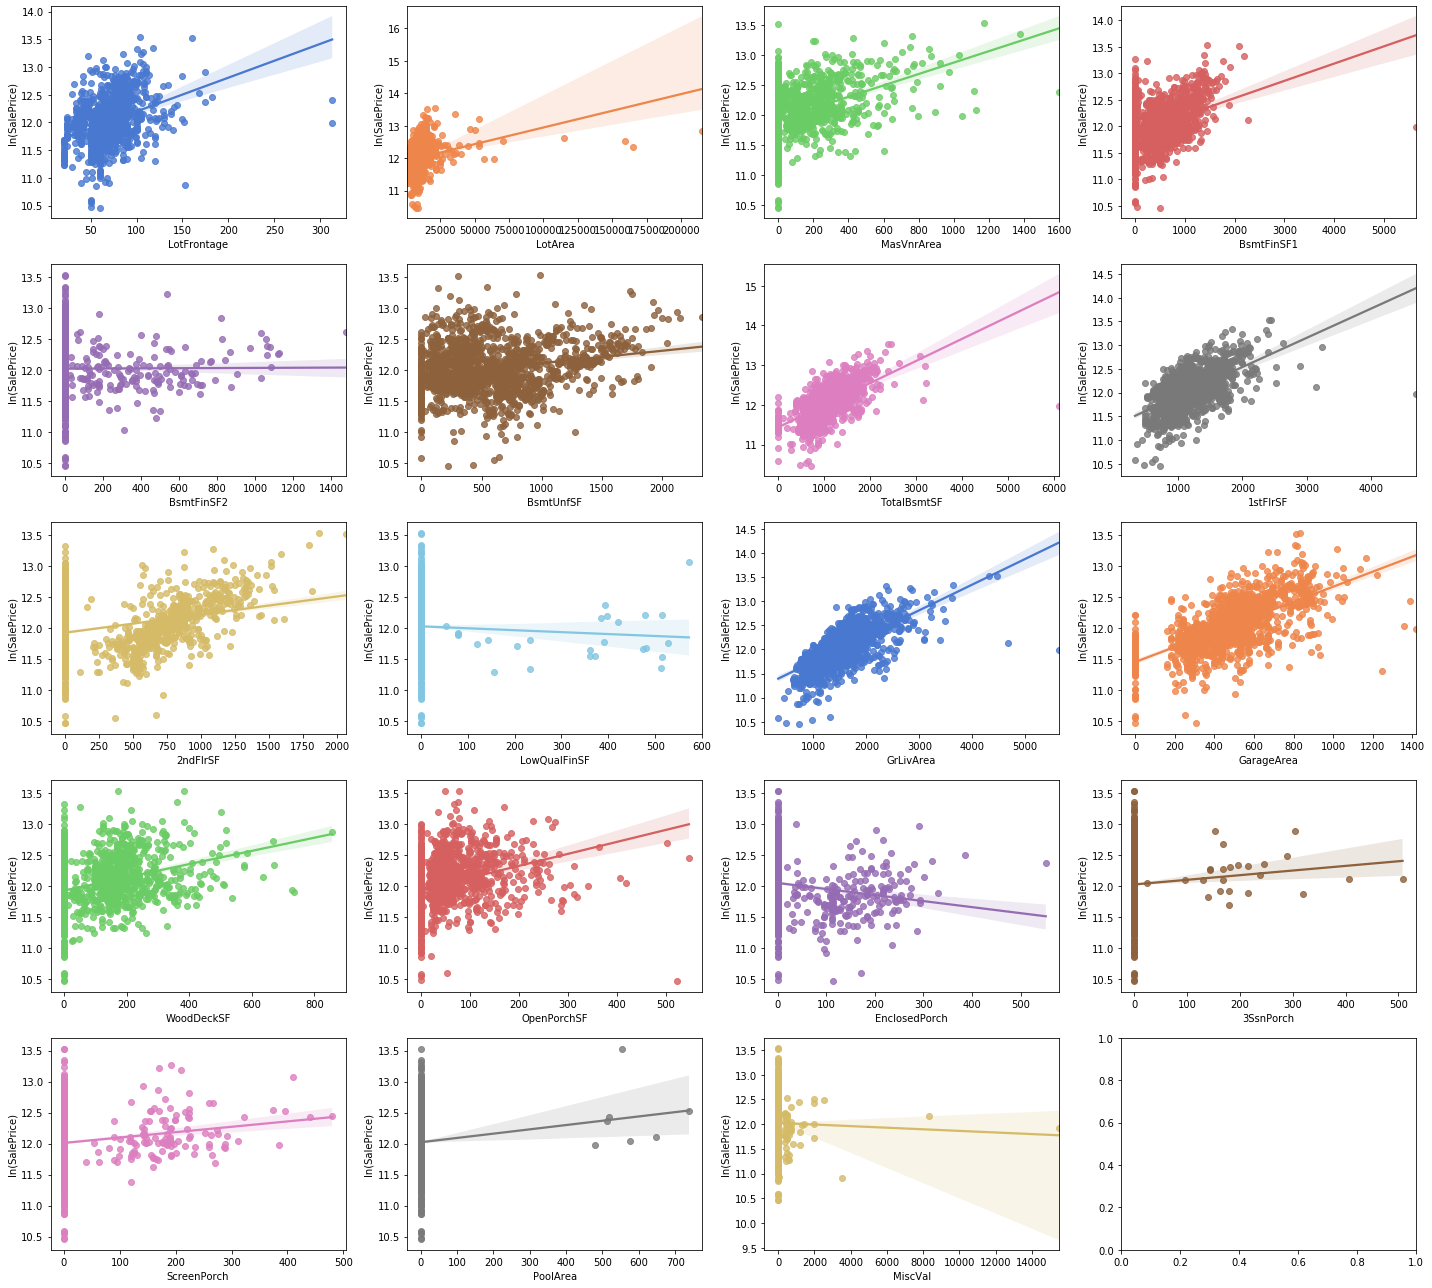

In [15]:
# Plotting scaterrplots of numerical features versus the target variable 'SalePrice'
fig, axs = plt.subplots(5, 4)
fig.set_size_inches(20, 18)
for i in range(len((cont_feats))):
    sns.regplot(x=data[cont_feats].iloc[:, i], y=data['ln(SalePrice)'],
                ax=axs[i//4, i % 4], color=standard_palette[i])

plt.tight_layout()

### 3.6 - Bivariate analysis of discrete features (do diff. in means w barchart)

### 3.7 - Bivariate analysis of categorical features

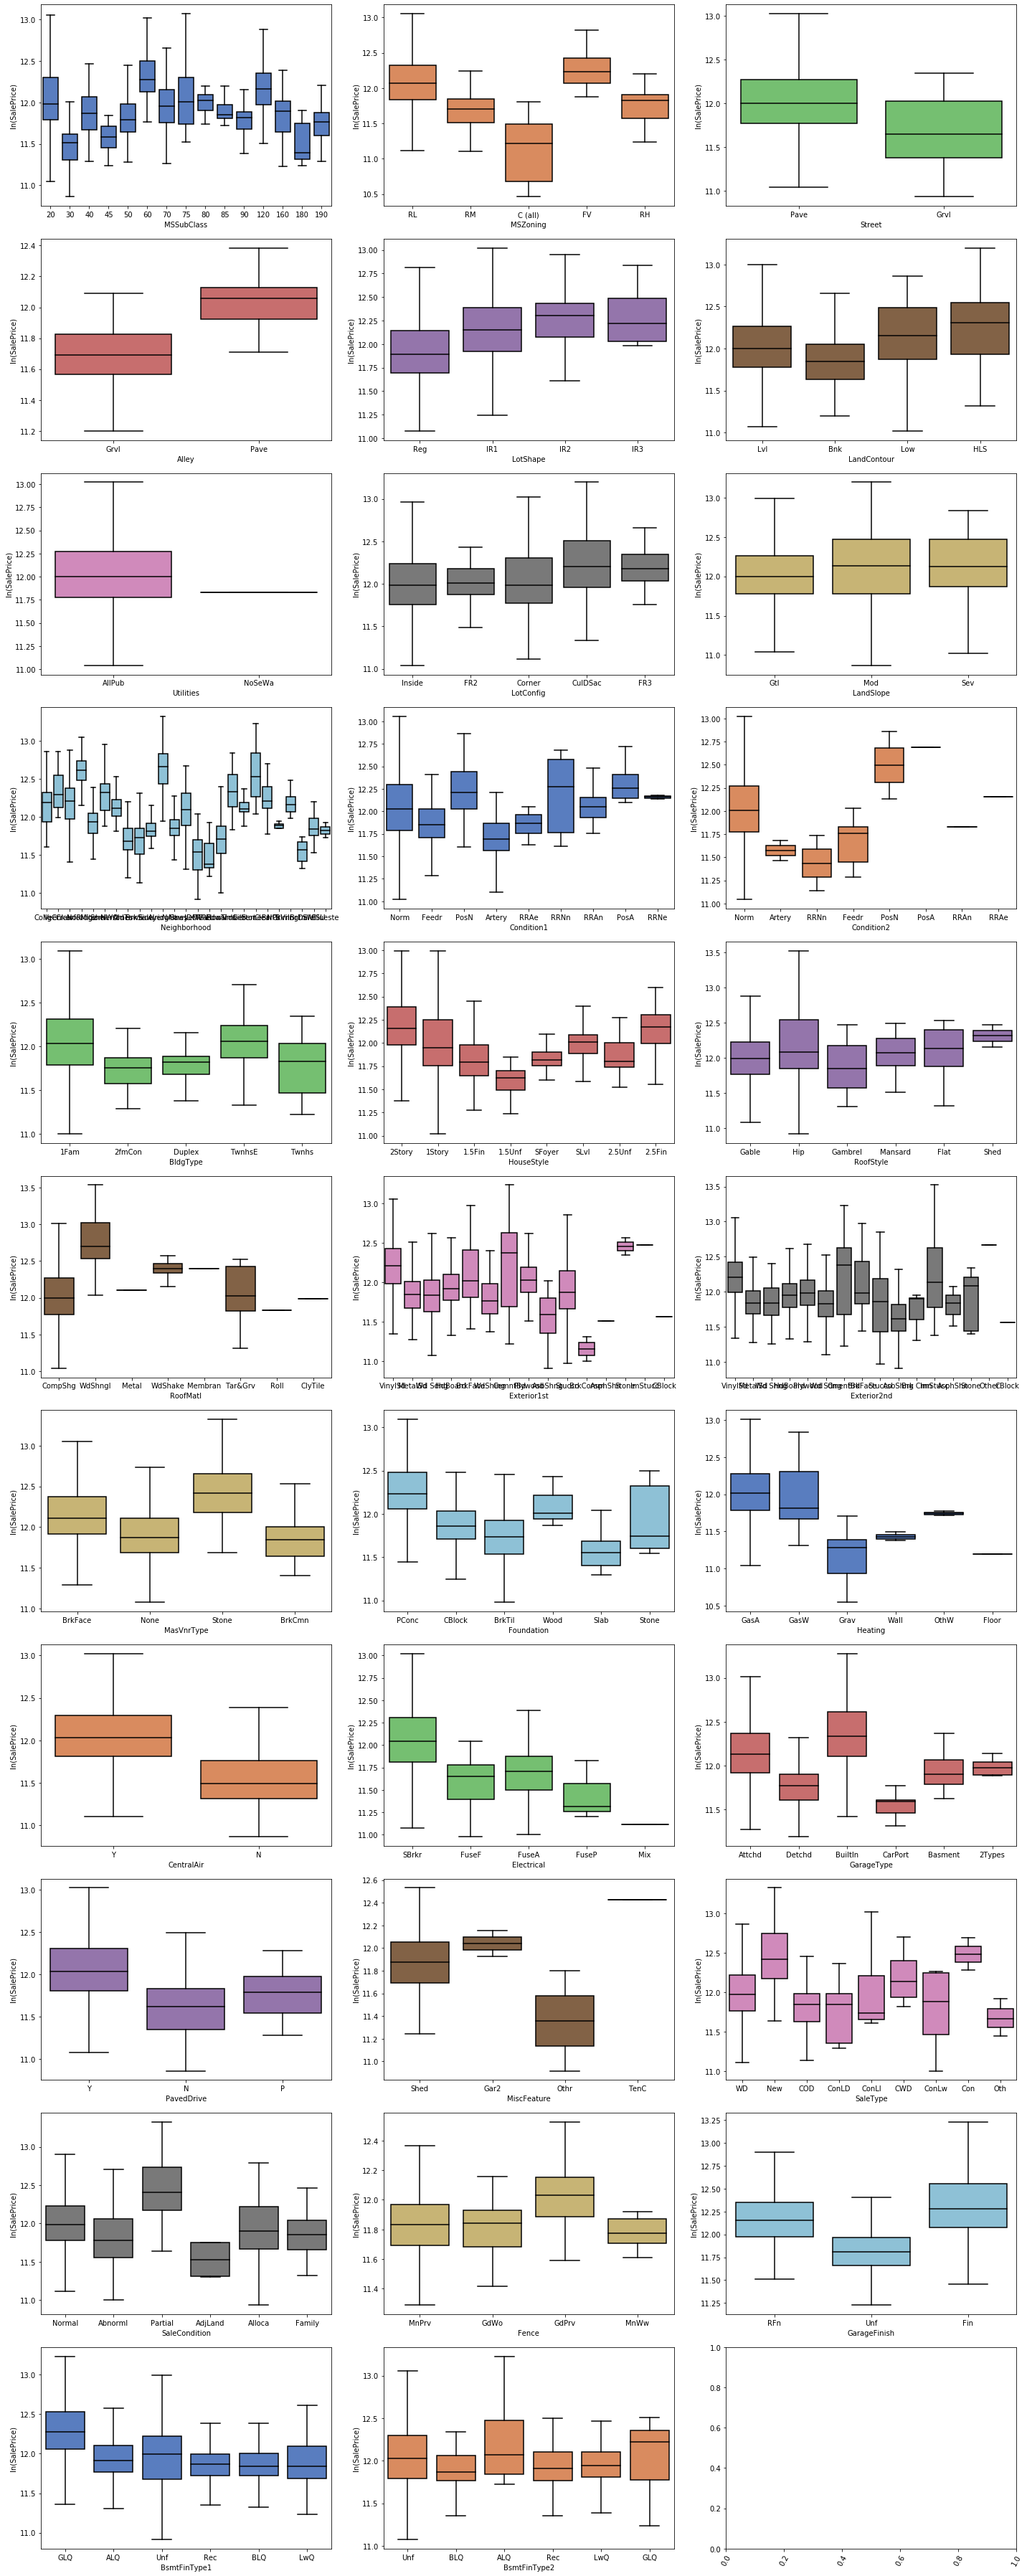

In [16]:
# Plotting distribution of data for ordinal features
fig, axs = plt.subplots(11, 3)
fig.set_size_inches(20, 50)

props = {
    'boxprops': {'edgecolor': 'black'},
    'medianprops': {'color': 'black'},
    'whiskerprops': {'color': 'black'},
    'flierprops': {'color': 'black'},
    'showfliers': False,
    'capprops': {'color': 'black'}
}

for i in range(len(cat_feats)):
    sns.boxplot(x=data[cat_feats].iloc[:, i].dropna(), y=data['ln(SalePrice)'],
                ax=axs[i//3, i % 3], color=standard_palette[i], **props)
    plt.xticks(rotation=60)

plt.tight_layout()

### 3.6 - Correlation between features

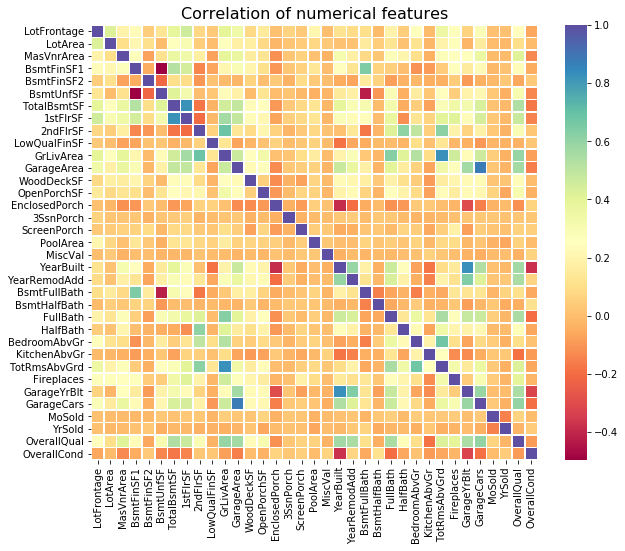

In [17]:
# Calculating correlation matrix of numerical features
correlations = (data[cont_feats+disc_feats]).corr()

f, axs = plt.subplots(figsize=(10, 8))
sns.heatmap(correlations, cmap="Spectral", linewidths=0.5, ax=axs)
plt.title('Correlation of numerical features', size=16)
plt.show()

In [18]:
# Finding correlation matrix for highly correlated features
high_corr = correlations[(correlations > abs(0.7)) & (correlations != 1)]
high_corr = high_corr.dropna(how='all')
high_corr = high_corr.dropna(axis=1, how='all')
high_corr

,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,YearBuilt,TotRmsAbvGrd,GarageYrBlt,GarageCars
TotalBsmtSF,NaN,0.81953,NaN,NaN,NaN,NaN,NaN,NaN
1stFlrSF,0.81953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,NaN,NaN,NaN,0.825489,NaN,NaN
GarageArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.882475
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,0.825667,NaN
TotRmsAbvGrd,NaN,NaN,0.825489,NaN,NaN,NaN,NaN,NaN
GarageYrBlt,NaN,NaN,NaN,NaN,0.825667,NaN,NaN,NaN
GarageCars,NaN,NaN,NaN,0.882475,NaN,NaN,NaN,NaN


#### **Highly correlated features:**

- `YearBuilt` and `GarageYrBlt`
- `TotalBsmtSF` and `1stFlrSF`
- `GrLivArea` and `TotRmsAbvGrd`
- `GarageCars` and `GarageArea`

In [19]:
# Examining correlation of numerical features with
target_corr = data[cont_feats + disc_feats].corrwith(data['ln(SalePrice)'])
target_corr = target_corr.sort_values(ascending=False)
print('Correlation of numerical features with target variable:')
print('')
target_corr

Correlation of numerical features with target variable:



OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
dtype: float64

#### **NOTES FROM (3.4):**

* The following features are highly correlated:
    - `YearBuilt` and `GarageYrBlt`
    - `TotalBsmtSF` and `1stFlrSF`
    - `GrLivArea` and `TotRmsAbvGrd`
    - `GarageCars` and `GarageArea`
    
    
* The following variables should be deleted:
    * `GarageYrBlt`
    * `1stFlrSF`
    * `GarageArea`


### 3.7 - Missing values per feature

In [20]:
# Checking dataset missing values as percentage of total entries
null = pd.DataFrame(
    data={'%Missing Values': data.isnull().mean()[data.isnull().mean() > 0]})
null = round(null * 100, 2)
null = null.sort_values(by='%Missing Values', ascending=False)
null.index.name = 'Feature'
null

,%Missing Values
Feature,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55


## 4 - Data cleaning and preprocessing


> [4.1 - Outliers](#4.1---Outliers)
> 
> [4.2 - Highly correlated features](#4.2---Highly-correlated-features)
>
> [4.4 - Feature encoding](#4.4---Feature-encoding)
>
> [4.3 - Missing values](#4.3---Missing-values)
> 
> [4.5 - Log transforms](#4.5---Log-transforms)

### 4.1 - Outliers

From [3.5](#3.5---Bivariate-analysis-of-numerical-features), we identified potential outlier data points for the following features. We thus delete these observations in order to reduce feature skewness in training.

In [21]:
# Deleting outliers from dataset
data = data.drop(data[data['LotFrontage'] > 200].index)
data = data.drop(data[data['LotArea'] > 100000].index)
data = data.drop(data[data['MasVnrArea'] > 1200].index)
data = data.drop(data[data['BsmtFinSF1'] > 4000].index)
data = data.drop(data[data['TotalBsmtSF'] > 4000].index)
data = data.drop(data[data['1stFlrSF'] > 4000].index)
data = data.drop(data[(data['LowQualFinSF'] > 550) &
                      (data['SalePrice'] > 400000)].index)
data = data.drop(data[data['GrLivArea'] > 4000].index)
data = data.drop(data[data['EnclosedPorch'] > 500].index)
data = data.drop(data[data['MiscVal'] > 5000].index)

# Printing dataset summary
print('')
print('Training dataset')
data.info(verbose=False)
print('')


Training dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Columns: 81 entries, MSSubClass to ln(SalePrice)
dtypes: float64(4), int64(34), object(43)
memory usage: 925.7+ KB



### 4.2 - Highly correlated features

In [22]:
# We delete whichever highly correlated feature has lowest correlation with target variable
data = data.drop(columns=['GarageArea', 'GarageYrBlt', '1stFlrSF'])
cont_feats.remove('1stFlrSF')
cont_feats.remove('GarageArea')
disc_feats.remove('GarageYrBlt')

# Printing dataset summary
print('')
print('Training dataset:')
data.info(verbose=False)
print('')


Training dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Columns: 78 entries, MSSubClass to ln(SalePrice)
dtypes: float64(3), int64(32), object(43)
memory usage: 891.8+ KB



### 4.3 - Missing values


From [section 3.7](#3.7---Overview-of-missing-values), two things are evident:

1. There are many features with missing data
2. The features `PoolQC`, `MiscFeature`, `Alley`, `Fence`, and `FireplaceQu` are missing data for the majority of entries

We decide to deal with missing values as follows:
- The following features will be deleted: `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `FireplaceQu`
- Continuous numerical features: Missing values will be replaced by the feature mean
- Discrete numerical features: Missing values will be replaced by the rounded feature mean
- Categorical features: Missing values will be replaced by the feature mode


In [23]:
# Deleting PoolQC, MiscFeature, Alley, Fence, and FireplaceQu from data
data = data.drop(columns=['PoolQC', 'MiscFeature',
                          'Alley', 'Fence', 'FireplaceQu'])
disc_feats.remove('PoolQC')
disc_feats.remove('FireplaceQu')
cat_feats.remove('Fence')
cat_feats.remove('MiscFeature')
cat_feats.remove('Alley')


# Filling in missing values
for feat in cont_feats:
    data[feat] = data[feat].fillna(data[feat].mean())

for feat in disc_feats:
    data[feat] = data[feat].fillna(data[feat].mode()[0])

for feat in cat_feats:
    data[feat] = data[feat].fillna(data[feat].mode()[0])

# Printing dataset summary
print('')
print('Training dataset:')
data.info(verbose=False)
print('')


Training dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Columns: 73 entries, MSSubClass to ln(SalePrice)
dtypes: float64(3), int64(32), object(38)
memory usage: 835.4+ KB



### 4.4 - Feature encoding 

In [24]:
# Ordinal encoding discrete features
enc = OrdinalEncoder()
data[disc_feats] = enc.fit_transform(data[disc_feats])

# Transforming categorical features into dummy features
data = pd.get_dummies(data, columns=cat_feats,
                      prefix=cat_feats, drop_first=True)

# Printing dataset summary
print('')
print('Training dataset:')
data.info(verbose=False)
print('')


Training dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Columns: 215 entries, LotFrontage to BsmtFinType2_Unf
dtypes: float64(28), int64(16), uint8(171)
memory usage: 749.3 KB



### 4.6 - Log transforms

In [25]:
# Log-transforming our target vector
data['SalePrice'] = np.log1p(data['SalePrice'])

## 5 - Modelling


> [5.1 - Evaluation metrics](#5.1---Evaluation-metrics)
> 
>[5.2 - Retrieving and cleaning test data](#5.2---Retrieving-and-cleaning-test-data)
>
> [5.3 - Defining feature matrices and target vectors](#5.3---Defining-feature-matrices-and-target-vectors)
> 
> [5.4 - Initial model comparison](#5.4---Initial-model-comparison)
> 
> [5.5 - Hyperparameter tuning](#5.5---Hyperparameter-tuning)
>
> [5.6 - Final model](#5.6---Final-model)

### 5.1 - Evaluation metrics


The metric used to evaluate predictions is the Root-Mean-Squared-Error between the logarithm of actual sale prices and the logarithm of predicted sale prices (RMSLE).


### 5.2 - Retrieving and cleaning test data

In [26]:
# Retrieving test data and printing general overview
test_data = pd.read_csv('test.csv')
test_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 80 entries, Id to SaleCondition
dtypes: float64(11), int64(26), object(43)
memory usage: 912.0+ KB


In [27]:
# Deleting 'Id' column
test_data = test_data.drop(columns='Id')

# Deleting highly correlated features
test_data = test_data.drop(columns='GarageYrBlt')
test_data = test_data.drop(columns='1stFlrSF')
test_data = test_data.drop(columns='GarageArea')

# Checking testing dataset missing values
null = pd.DataFrame(data={'%Missing Values (test)': test_data.isnull().mean()[
                    test_data.isnull().mean() > 0]})
null = round(null * 100, 2)
null = null.sort_values(by='%Missing Values (test)', ascending=False)

null.index.name = 'Feature'
null

,%Missing Values (test)
Feature,
PoolQC,99.79
MiscFeature,96.50
Alley,92.67
Fence,80.12
FireplaceQu,50.03
LotFrontage,15.56
GarageCond,5.35
GarageQual,5.35
GarageFinish,5.35


In [28]:
# Dropping features with mostly missing observations
test_data = test_data.drop(
    columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

# Separating numerical feature names and categorical feature names
num_cont_feats = list(test_data.select_dtypes(include='float').columns)
num_dis_feats = list(test_data.select_dtypes(include='int').columns)
cat_feats = list(test_data.select_dtypes(exclude='number').columns)

# Filling in missing values
for feat in num_cont_feats:
    test_data[feat] = test_data[feat].fillna(test_data[feat].mean())

for feat in num_dis_feats:
    test_data[feat] = test_data[feat].fillna(round(test_data[feat].mean()))


for feat in cat_feats:
    test_data[feat] = test_data[feat].fillna(test_data[feat].mode()[0])

# One-hot encoding test dataset
test_data = pd.get_dummies(
    test_data, columns=cat_feats, prefix=cat_feats, drop_first=True)

# Printing dataset summary
print('Test dataset:')
test_data.info(verbose=False)
print('')

Test dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 213 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(9), int64(24), uint8(180)
memory usage: 632.7 KB



In [29]:
# Deleting training dataset features that don't appear in test dataset
test_feats = list(test_data.columns)
test_feats.append('SalePrice')

data = data[test_feats]

# Printing dataset summary
print('')
print('Training dataset:')
data.info(verbose=False)
print('')
print('Test dataset:')
test_data.info(verbose=False)
print('')


#test_data.to_csv('clean_test_data.csv', index=False)

KeyError: "['BsmtCond_TA', 'ExterQual_Gd', 'ExterQual_Fa', 'BsmtQual_TA', 'GarageCond_Po', 'HeatingQC_Fa', 'BsmtExposure_Gd', 'GarageCond_Gd', 'HeatingQC_Gd', 'GarageQual_TA', 'HeatingQC_Po', 'Functional_Sev', 'GarageCond_TA', 'ExterCond_Fa', 'Functional_Min1', 'BsmtExposure_No', 'BsmtCond_Gd', 'ExterQual_TA', 'ExterCond_Gd', 'BsmtExposure_Mn', 'ExterCond_Po', 'BsmtQual_Gd', 'GarageFinish_Unf', 'Functional_Typ', 'Functional_Min2', 'BsmtCond_Po', 'KitchenQual_Gd', 'ExterCond_TA', 'GarageQual_Gd', 'MSSubClass', 'KitchenQual_TA', 'KitchenQual_Fa', 'BsmtQual_Fa', 'GarageCond_Fa', 'Functional_Mod', 'Functional_Maj2', 'GarageFinish_RFn', 'HeatingQC_TA', 'GarageQual_Po'] not in index"

### 5.3 - Defining feature matrices and target vectors

In [ ]:
# Defining training feature matrix and target vector
X_train = data.drop(columns='SalePrice')
y_train = data['SalePrice']

# Defining test feature matrix
X_test = test_data

### 5.4 - Initial model comparison

In this section, we compare the performance of different prediction models prior to hyperparameter tuning. Since the target variable `SalePrice` is continuous, making its prediction a regression problem, the following models will be compared:

* Linear regression
* Ridge regression
* Lasso regression
* Elastic Net regression
* KNN regressor
* Decision Tree regressor
* Random Forest regressor

For two of these models (Elastic Net and Lasso) feature data will be standardized as this is known to significantly improve performance. For the KNN model, feature data will be normalized for the same reason. Finally, the maximum number of itterations for the Lasso model has been increased to 30,000 to facilitate convergence.


In [ ]:
# Instantiating cross-validation score arrays:
# Feature data for Elastic Net and Lasso models is standardized
# Feature data for KNN is normalized

models = {'Linear regression': Pipeline([('model', LinearRegression())]),
          'Ridge': Pipeline([('scaler', StandardScaler()), ('model', Ridge())]),
          'Lasso': Pipeline([('scaler', StandardScaler()), ('model', Lasso(max_iter=5000))]),
          'Elastic Net': Pipeline([('scaler', StandardScaler()), ('model', ElasticNet(max_iter=5000))]),
          'KNN': Pipeline([('scaler', Normalizer()), ('model', KNeighborsRegressor())]),
          'Random Forest': Pipeline([('model', RandomForestRegressor(random_state=0))])}


Next, we utilize 10-fold cross-validation on the training dataset to compute the average Mean Absolute Error across folds:


In [ ]:
# 10-fold cross-validation of predictive models using default hyperparameters

cv_mae_scores = []
cv_training_times = []

for key in models:
    print('Running ' + key + ' model...')

    %time cv = cross_validate(models[key], X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
    cv_mae_scores.append(cv['test_score'].mean())
    cv_training_times.append(cv['fit_time'].mean())

    print('Finished running.')
    print('')

scores = pd.DataFrame(data={'Model': list(models.keys()),
                            'Average MAE ($USD)': cv_mae_scores,
                            'Average Training Time (seconds)': cv_training_times})

scores['Average MAE ($USD)'] = round(scores['Average MAE ($USD)']*(-1), 3)
scores = scores.set_index('Model').sort_values(
    by='Average MAE ($USD)', ascending=True)
scores

From the console output above, two things can be concluded:

1. KNN and Decision trees performed significantly worse than all other models.
2. Random Forest and Lasso regression were decisively slower.

Nevertheless, since none of these models are exceedingly computationally expensive, we will carry on comparing all of them as their performance could change significantly after hyperparameters are tuned.

### 5.5 - Hyperparameter tuning


In order to carry out hyperparameter tuning, we first specify the parameters that will be tuned in each model as well as the range of values that they may take:


In [ ]:
# Hyperparameters for Ridge regression
ridge_params = {'model__alpha': np.linspace(0.5, 20, 40),
                'scaler__with_mean': [True, False],
                'scaler__with_std': [True, False]}

# Hyperparameters for Lasso regression
lasso_params = {'model__alpha': np.linspace(0.5, 20, 40),
                'scaler__with_mean': [True, False],
                'scaler__with_std': [True, False]}

# Hyperparameters for Elastic Net regression
e_net_params = {'model__alpha': np.linspace(1, 20, 20),
                'model__l1_ratio': np.linspace(0, 1, 21),
                'scaler__with_mean': [True, False],
                'scaler__with_std': [True, False]}

# Hyperparameters for KNN regressor
knn_params = {'model__n_neighbors': np.arange(1, 50, 1)}

# Hyperparameters for Random Forest classifier
rf_params = {'model__n_estimators': np.arange(10, 310, 10),
             'model__max_features': ['auto', 'sqrt', 'log2'],
             'model__max_depth': np.arange(1, 200, 1),
             'model__min_samples_split': np.arange(2, 20, 1),
             'model__min_samples_leaf': np.arange(1, 10, 1),
             'model__bootstrap': [True, False]
             }

model_param_grids = {'Ridge': ridge_params,
                     'Lasso': lasso_params,
                     'Elastic Net': e_net_params,
                     'KNN': knn_params,
                     'Random Forest': rf_params}


We now utilize grid search 5-fold cross-validation to iterate over the hyperparameter value ranges and find the optimal combination:


In [ ]:
cv_scores = []

for key in models:

    print('Running ' + key + ' model...')

    if key in ['Ridge', 'Lasso', 'KNN']:
        grid_search_cv = GridSearchCV(
            models[key], model_param_grids[key], scoring='neg_mean_absolute_error')
        %time grid_search_cv.fit(X_train, y_train)
        cv_scores.append(grid_search_cv.best_score_)
        print(grid_search_cv.best_params_)

    elif key in ['Elastic Net', 'Random Forest']:
        rand_search_cv = RandomizedSearchCV(models[key],
                                            model_param_grids[key],
                                            scoring='neg_mean_absolute_error',
                                            random_state=0)

        %time rand_search_cv.fit(X_train, y_train)
        cv_scores.append(rand_search_cv.best_score_)
        print(rand_search_cv.best_params_)

    print('Finished running.')
    print('')

scores = pd.DataFrame(data={'Model': list(models.keys()),
                            'Average MAE ($USD)': cv_scores})

scores['Average MAE ($USD)'] = round(scores['Average MAE ($USD)']*(-1), 3)
scores = scores.set_index('Model').sort_values(
    by='Average MAE ($USD)', ascending=True)
scores

### 5.6 - Final model

The final Random Forrest model is instantiated with the optimal hyperparameter arguments derived in section 5.4 and trained using the features selected in section 5.3.

In [ ]:
# Separating target variable vector y
y = data['SalePrice']

# Creating feature matrix X
X = data[selected_features]

# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_final_model = RandomForestRegressor(
    random_state=0, n_estimators=180, max_depth=16)

# fit rf_model_on_full_data on all data from the training data
rf_final_model.fit(X, y)

## 6 - Final predictions and submission

In [ ]:
# Creating feature matrix for test data
test_X = test_data[selected_features]

# Predicting SalePrice for test data
test_preds = rf_final_model.predict(test_X)

# Creating submission file
output = pd.DataFrame({'Id': test_data.Id, 'SalePrice': test_preds})
output.to_csv('submission1.csv', index=False)